# 1. Dataset statistics

In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

""" Styling for the plot """
def setup_axes(ax, xlabel: str, ylabel: str) -> None:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(xlabel, fontsize="x-large", fontfamily="Helvetica Neue")
    ax.set_ylabel(ylabel, fontsize="x-large", fontfamily="Helvetica Neue")
    ax.tick_params(axis='both', which='major', labelsize="x-large", labelfontfamily="Helvetica Neue", direction="out")

## Reading lists

In [2]:
reading_lists = pd.read_csv("../reading_lists.csv")
reading_lists['reading_list'] = reading_lists['reading_list'].apply(ast.literal_eval); reading_lists

,id,title,abstract,year,url,venues,reading_list
0,C16-3001,Compositional Distributional Models of Meaning,Compositional distributional models of meaning...,2016,https://aclanthology.org/C16-3001/,COLING,[{'paperId': '37efe2ef1b9d27cc598361a8013ec888...
1,P19-4004,Computational Analysis of Political Texts: Bri...,"In the last twenty years, political scientists...",2019,https://aclanthology.org/P19-4004/,ACL,[{'paperId': 'b9921fb4d1448058642897797e77bdaf...
2,2020.acl-tutorials.1,Interpretability and Analysis in Neural NLP,While deep learning has transformed the natura...,2020,https://aclanthology.org/2020.acl-tutorials.1,ACL,[{'paperId': '668f42a4d4094f0a66d402a16087e142...
3,2020.acl-tutorials.2,Integrating Ethics into the NLP Curriculum,To raise awareness among future NLP practition...,2020,https://aclanthology.org/2020.acl-tutorials.2,ACL,[{'paperId': '0e661bd2cfe94ed58e4e2abc1409c75b...
4,2020.acl-tutorials.3,Achieving Common Ground in Multi-modal Dialogue,All communication aims at achieving common gro...,2020,https://aclanthology.org/2020.acl-tutorials.3,ACL,[{'paperId': '5a9cac54de14e58697d0315fe3c01f3d...
...,...,...,...,...,...,...,...
80,2024.lrec-tutorials.11,Tutorial Proposal: Hallucination in Large Lang...,In the fast-paced domain of Large Language Mod...,2024,https://aclanthology.org/2024.lrec-tutorials.11,LREC,[{'paperId': 'd00735241af700d21762d2f3ca00d920...
81,2024.lrec-tutorials.13,Knowledge-enhanced Response Generation in Dial...,This tutorial provides an in-depth exploration...,2024,https://aclanthology.org/2024.lrec-tutorials.13,LREC,[{'paperId': 'a6401e102c03a441992b3e45f7b63eec...
82,2024.naacl-tutorials.2,Combating Security and Privacy Issues in the E...,This tutorial seeks to provide a systematic su...,2024,https://aclanthology.org/2024.naacl-tutorials.2,NAACL,[{'paperId': '3a1f8829e641b46f661775f64a7f27b9...
83,2024.naacl-tutorials.4,From Text to Context: Contextualizing Language...,Aimed at the NLP researchers or practitioners ...,2024,https://aclanthology.org/2024.naacl-tutorials.4,NAACL,[{'paperId': 'bdb73be49c4fdcbd0c79ca62e5703155...


## Venues and conferences

In [3]:
venues = (reading_lists['venues']).unique()
print(f"{len(venues)} venues:\n {venues}\n")

confs = (reading_lists['venues'] + ' '  + reading_lists['year'].astype(str)).unique()
print(f"{len(confs)} conferences:\n {confs}")

9 venues:
 ['COLING' 'ACL' 'EMNLP' 'ACL, IJCNLP' 'EACL' 'NAACL' 'AACL, IJCNLP'
 'IJCNLP, AACL' 'LREC']

20 conferences:
 ['COLING 2016' 'ACL 2019' 'ACL 2020' 'COLING 2020' 'EMNLP 2020'
 'ACL, IJCNLP 2021' 'EACL 2021' 'EMNLP 2021' 'NAACL 2021'
 'AACL, IJCNLP 2022' 'ACL 2022' 'EMNLP 2022' 'NAACL 2022' 'ACL 2023'
 'EACL 2023' 'EMNLP 2023' 'IJCNLP, AACL 2023' 'EACL 2024' 'LREC 2024'
 'NAACL 2024']


## Lists items histogram

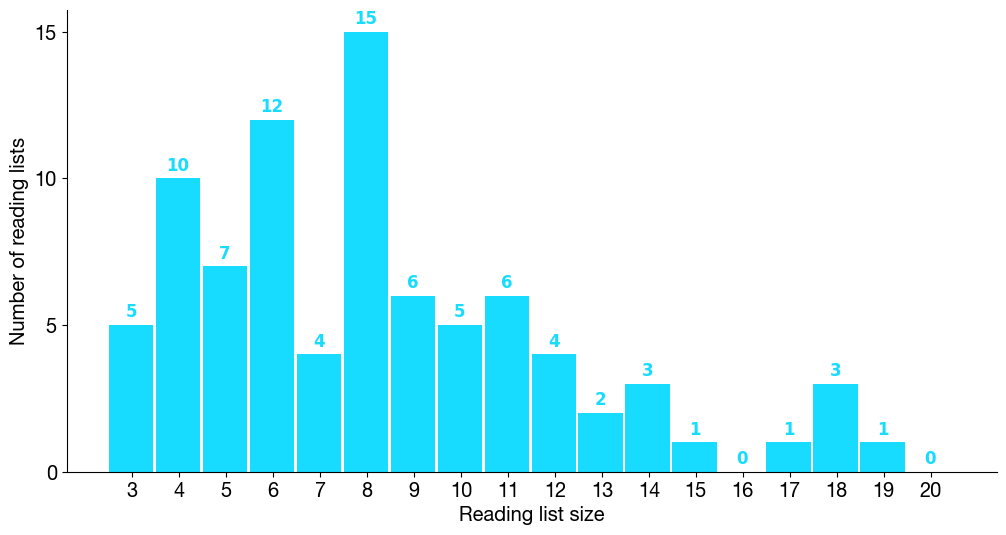

In [4]:
sizes = [len(v) for v in reading_lists['reading_list']]
weights, bins= np.histogram(sizes, bins=range(3,22))

#Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(bins[:-1], bins - 0.5, weights=weights, align='mid', color="#18dcff", width=0.95)
for container in ax.containers: # Add bar labels
    ax.bar_label(container, padding=3, fontweight="bold", fontsize="large", color="#18dcff")
setup_axes(ax, "Reading list size", "Number of reading lists")
ax.set_xticks(range(np.min(bins),np.max(bins),1))  # Adjust x-ticks specific to histogram
ax.set_yticks(range(np.min(weights),np.max(weights)+5,5))  # Adjust x-ticks specific to histogram
plt.show()

In [5]:
#Avg references
sizes = []
for _, row in reading_lists.iterrows():
    sizes.append(len(row["reading_list"]))
    
print(f"Average size of lists is {round(np.mean(sizes))}, with a minimum of {np.min(sizes)} and a maximum of {np.max(sizes)}.")

Average size of lists is 8, with a minimum of 3 and a maximum of 19.


## References stats

In [6]:
missing_abs = []
for _, row in reading_lists.iterrows():
    for reference in row["reading_list"]:
        if "abstract" not in reference or reference['abstract'] == '': 
            missing_abs.append(reference["title"])
            
print(f"Some referenced articles don't provide an abstract:\n {missing_abs}")

Some referenced articles don't provide an abstract:
 ['Last Words: Reviewing the Reviewers', 'Double-blind peer review and gender publication bias', 'Peer review — reviewed', 'Last Words: Breaking News: Changing Attitudes and Practices', 'Last Words: Natural Language Processing and Linguistic Fieldwork', 'Interpreting Motion - Grounded Representations for Spatial Language', 'Spatial Role Labeling Annotation Scheme', 'Last Words: Reviewing the Reviewers', 'Double-blind peer review and gender publication bias', 'Last Words: On Becoming a Discipline', 'Last Words: Breaking News: Changing Attitudes and Practices']


In [7]:
references = []
for _, row in reading_lists.iterrows():
    for reference in row["reading_list"]:
        references.append(reference["corpusId"])
print(f"Out of {len(references)} references, {len(set(references))} are unique.")

Out of 701 references, 627 are unique.


## Years of publication

Average publication year of references is 2018, for oldest published reference in 1977 and more recent in of 2023.


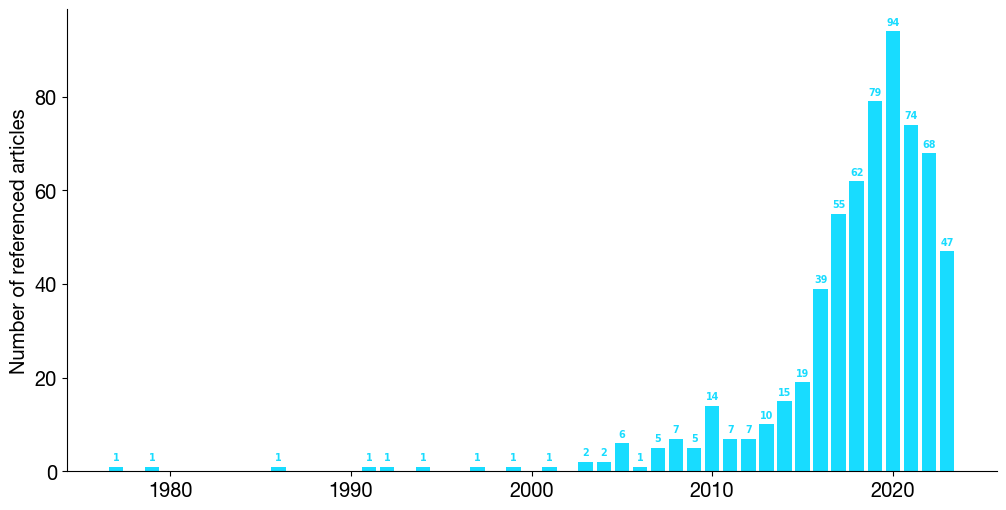

In [8]:
unique_references = []
years = []
for _, row in reading_lists.iterrows():
    for reference in row["reading_list"]:
        if reference["corpusId"] not in [ref["corpusId"] for ref in unique_references]:
            unique_references.append(reference)
            years.append(reference["year"])
print(f"Average publication year of references is {round(np.mean(years))}, for oldest published reference in {np.min(years)} and more recent in of {np.max(years)}.")

unique, counts = np.unique(years, return_counts=True)

#Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(unique, counts, color='#18dcff')
for container in ax.containers:# Add bar labels
    ax.bar_label(container, padding=3, fontweight="bold", fontsize="x-small", color='#18dcff')
setup_axes(ax, "", "Number of referenced articles")
plt.show()

## Sections Stats

In [9]:
nb_no_section = 0
section = 0
subsection = 0

for reading_list in reading_lists["reading_list"].to_list():
    sections = [reference["section"] for reference in reading_list if reference["section"]]
    subsections = [reference["subsection"] for reference in reading_list if reference["subsection"]]
    if not len(sections) and not len(subsections):
        nb_no_section +=1
    elif len(sections) and not len(subsections):
        section +=1
    elif len(sections) and len(subsections):
        subsection +=1

print(f"Out of {len(reading_lists)}, {nb_no_section} have no section, {section} have 1-level sections and {subsection} have 2-level sections")

Out of 85, 58 have no section, 24 have 1-level sections and 3 have 2-level sections


## Citations stats

Average amount of citations of referenced articles is 3533, median is 154.0, minimun is 0 and maximum is 109003.


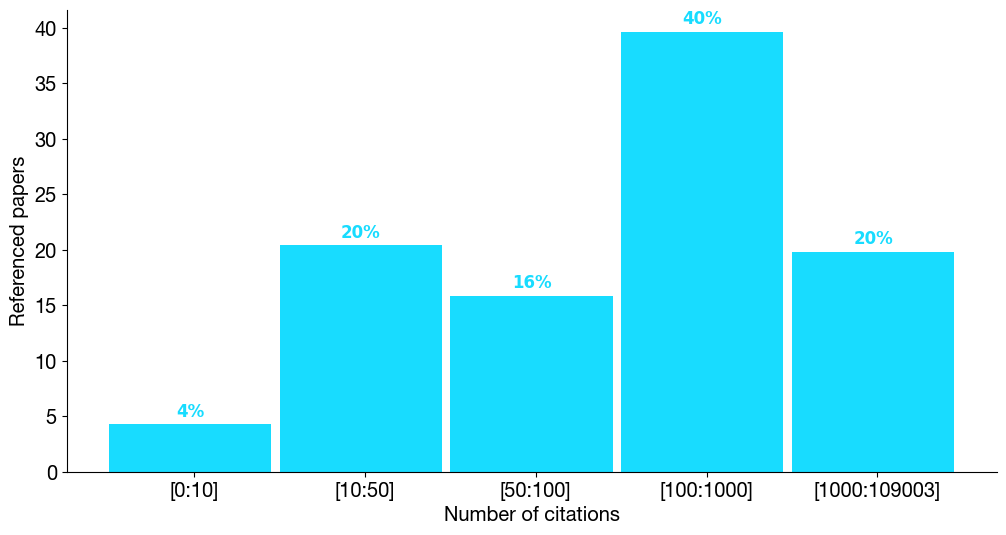

In [15]:
data = []
for _, row in reading_lists.iterrows():
    data = data + [reference["citationCount"]  for reference in row["reading_list"]]
print(f"Average amount of citations of referenced articles is {round(np.mean(data))}, median is {np.median(data)}, minimun is {np.min(data)} and maximum is {np.max(data)}.")
hist, bins = np.histogram(data, [0, 10, 50, 100, 1000, max(data)])
hist = [(count / len(data)) * 100 for count in hist]

#Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(hist)),hist,width=0.95, align="edge", color='#18dcff') 
for container in ax.containers:# Add bar labels
    ax.bar_label(container,fmt='%.0f%%', padding=3, fontweight="bold", fontsize="large", color='#18dcff')
setup_axes(ax, "Number of citations", "Referenced papers")
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
ax.set_xticklabels([f"[{bins[i]}:{bins[i+1]}]" for i,j in enumerate(hist)])
plt.show()